In [2]:
import tsfresh as ts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle

In [3]:
with open('../02_Daten/Kaffeemaschine/preprocessed_coffee_scaled.pickle', 'rb') as handle:
    df = pickle.load(handle)

### DF passend für tsfresh machen

In [4]:
df.head()

,time,day_number,day_name,Status,x,y,z
0,2022-01-28 10:39:28.532,4,Freitag,0,-0.286314,0.185127,-0.094353
1,2022-01-28 10:39:28.742,4,Freitag,0,-0.224631,0.579710,0.564770
2,2022-01-28 10:39:28.915,4,Freitag,0,0.104340,1.368876,0.011101
3,2022-01-28 10:39:29.237,4,Freitag,0,-0.327435,1.095703,-0.278910
4,2022-01-28 10:39:29.455,4,Freitag,0,0.289387,1.186761,-0.331649


In [5]:
df.drop(['day_number','day_name','Status'], axis=1, inplace=True)

In [6]:
df['id'] = 1

In [7]:
df.head()

,time,x,y,z,id
0,2022-01-28 10:39:28.532,-0.286314,0.185127,-0.094353,1
1,2022-01-28 10:39:28.742,-0.224631,0.579710,0.564770,1
2,2022-01-28 10:39:28.915,0.104340,1.368876,0.011101,1
3,2022-01-28 10:39:29.237,-0.327435,1.095703,-0.278910,1
4,2022-01-28 10:39:29.455,0.289387,1.186761,-0.331649,1


## Rolling

mit größerem Datensatz probieren

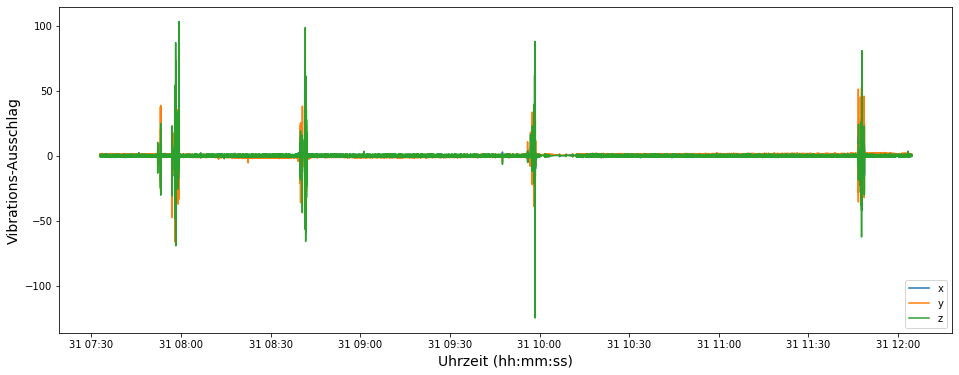

In [13]:
intersection = 1480000
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-50000 : intersection+40000], df.x[intersection-50000 : intersection+40000], label="x")
ax.plot(df.time[intersection-50000 : intersection+40000], df.y[intersection-50000 : intersection+40000], label='y')
ax.plot(df.time[intersection-50000 : intersection+40000], df.z[intersection-50000 : intersection+40000], label='z')

ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)

plt.legend(loc=4)

In [8]:
df_small = df[1480000-50000:1480000+40000]

In [9]:
df_small

,time,x,y,z,id
1430000,2022-01-31 07:32:53.719,-0.327435,-0.209456,0.063827,1
1430001,2022-01-31 07:32:53.861,-0.306874,0.215479,0.169294,1
1430002,2022-01-31 07:32:54.086,-0.162949,0.245832,0.380214,1
1430003,2022-01-31 07:32:54.289,-0.676967,0.245832,-0.700762,1
1430004,2022-01-31 07:32:54.409,0.063219,-0.179104,0.432953,1
...,...,...,...,...,...
1519995,2022-01-31 12:04:32.278,0.289387,1.368876,-0.358012,1
1519996,2022-01-31 12:04:32.450,0.741723,0.458300,-0.015263,1
1519997,2022-01-31 12:04:32.623,-0.039585,1.217114,-0.147093,1
1519998,2022-01-31 12:04:32.780,0.494994,0.154774,-0.252546,1


In [10]:
df_small.time = df_small.index

c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df_small

,time,x,y,z,id
1430000,1430000,-0.327435,-0.209456,0.063827,1
1430001,1430001,-0.306874,0.215479,0.169294,1
1430002,1430002,-0.162949,0.245832,0.380214,1
1430003,1430003,-0.676967,0.245832,-0.700762,1
1430004,1430004,0.063219,-0.179104,0.432953,1
...,...,...,...,...,...
1519995,1519995,0.289387,1.368876,-0.358012,1
1519996,1519996,0.741723,0.458300,-0.015263,1
1519997,1519997,-0.039585,1.217114,-0.147093,1
1519998,1519998,0.494994,0.154774,-0.252546,1


In [12]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df_small, column_id="id", column_sort="time", max_timeshift=50, rolling_direction=4) 
#rolling_direction: The absolute value decides, how much to shift at each step. -> um Zeit und Ressourcen zu sparen, immer 4 Schritte gehen

Rolling: 100%|██████████| 10/10 [01:57<00:00, 11.75s/it]


In [13]:
df_rolled

,time,x,y,z,id
0,1430000,-0.327435,-0.209456,0.063827,"(1, 1430003)"
1,1430001,-0.306874,0.215479,0.169294,"(1, 1430003)"
2,1430002,-0.162949,0.245832,0.380214,"(1, 1430003)"
3,1430003,-0.676967,0.245832,-0.700762,"(1, 1430003)"
4,1430000,-0.327435,-0.209456,0.063827,"(1, 1430007)"
...,...,...,...,...,...
1147195,1519995,0.289387,1.368876,-0.358012,"(1, 1519999)"
1147196,1519996,0.741723,0.458300,-0.015263,"(1, 1519999)"
1147197,1519997,-0.039585,1.217114,-0.147093,"(1, 1519999)"
1147198,1519998,0.494994,0.154774,-0.252546,"(1, 1519999)"


In [1]:
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters
settings = MinimalFCParameters()
# eine minimale Auswahl an Parametern für extract_features, um Zeit und Ressourcen zu sparen
# weitere Möglichkeit ist EfficientFCParameters(), welche Features mit hohem Rechenaufwand nicht berechnet

In [14]:
from tsfresh import extract_features
df_features = extract_features(df_rolled, column_id="id", column_sort="time", default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 10/10 [00:28<00:00,  2.86s/it]


In [15]:
df_features

x__sum_values  x__median   x__mean  x__length  \
1 1430003      -1.474226  -0.317155 -0.368556        4.0   
  1430007      -1.858733  -0.224631 -0.232342        8.0   
  1430011      -2.633895  -0.255472 -0.219491       12.0   
  1430015      -2.627748  -0.142388 -0.164234       16.0   
  1430019      -3.073938  -0.142388 -0.153697       20.0   
...                  ...        ...       ...        ...   
  1519983      12.085836   0.227704  0.236977       51.0   
  1519987      12.147518   0.227704  0.238187       51.0   
  1519991      11.222286   0.207144  0.220045       51.0   
  1519995      12.065276   0.248266  0.236574       51.0   
  1519999      13.237238   0.289387  0.259554       51.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1430003               0.189002     0.035722             0.414193   
  1430007               0.210418     0.044276             0.313462   
  1430011               0.217614     0.047356             0.309083   
  1430015               0.215455     0.046421             0.270913   
  1430019               0.261168     0.068209             0.303037   
...                          ...          ...                  ...   
  1519983               0.275680     0.076000             0.363535   
  1519987               0.275020     0.075636             0.363825   
  1519991               0.254239     0.064638             0.336240   
  1519995               0.267189     0.071390             0.356871   
  1519999               0.289181     0.083626             0.388579   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1430003   -0.162949             0.676967   -0.676967  ...      -0.087427   
  1430007    0.063219             0.676967   -0.676967  ...      -0.359399   
  1430011    0.186583             0.676967   -0.676967  ...       0.924185   
  1430015    0.186583             0.676967   -0.676967  ...       1.522270   
  1430019    0.494994             0.676967   -0.676967  ...       1.434855   
...               ...                  ...         ...  ...            ...   
  1519983    0.803405             0.803405   -0.450799  ...       1.594517   
  1519987    0.803405             0.803405   -0.450799  ...       2.411833   
  1519991    0.741723             0.741723   -0.286314  ...       2.622766   
  1519995    0.803405             0.803405   -0.286314  ...       2.306392   
  1519999    0.803405             0.803405   -0.286314  ...       0.909030   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1430003   0.116561 -0.021857        4.0               0.408183     0.166613   
  1430007  -0.041633 -0.044925        8.0               0.360405     0.129892   
  1430011   0.116561  0.077015       12.0               0.410362     0.168397   
  1430015   0.142930  0.095142       16.0               0.358393     0.128445   
  1430019   0.103385  0.071743       20.0               0.333301     0.111090   
...              ...       ...        ...                    ...          ...   
  1519983   0.037464  0.031265       51.0               0.367509     0.135063   
  1519987   0.037464  0.047291       51.0               0.381355     0.145431   
  1519991   0.037464  0.051427       51.0               0.389362     0.151603   
  1519995   0.037464  0.045223       51.0               0.395163     0.156153   
  1519999  -0.015263  0.017824       51.0               0.389484     0.151698   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1430003             0.408768    0.380214             0.700762   -0.700762  
  1430007             0.363194    0.432953             0.700762   -0.700762  
  1430011             0.417526    0.960259             0.960259   -0.700762  
  1430015             0.370807    0.960259             0.960259   -0.700762  
  1430019             0.340935    0.960259             0.960259   -0.700762  
...                        ...         ...                  ...        

In [16]:
df_features_finite = df_features.replace([np.inf, -np.inf], np.nan)

In [17]:
df_features_col_nan = df_features_finite.dropna(axis=1, how='all')

In [18]:
df_features_col_nan

x__sum_values  x__median   x__mean  x__length  \
1 1430003      -1.474226  -0.317155 -0.368556        4.0   
  1430007      -1.858733  -0.224631 -0.232342        8.0   
  1430011      -2.633895  -0.255472 -0.219491       12.0   
  1430015      -2.627748  -0.142388 -0.164234       16.0   
  1430019      -3.073938  -0.142388 -0.153697       20.0   
...                  ...        ...       ...        ...   
  1519983      12.085836   0.227704  0.236977       51.0   
  1519987      12.147518   0.227704  0.238187       51.0   
  1519991      11.222286   0.207144  0.220045       51.0   
  1519995      12.065276   0.248266  0.236574       51.0   
  1519999      13.237238   0.289387  0.259554       51.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1430003               0.189002     0.035722             0.414193   
  1430007               0.210418     0.044276             0.313462   
  1430011               0.217614     0.047356             0.309083   
  1430015               0.215455     0.046421             0.270913   
  1430019               0.261168     0.068209             0.303037   
...                          ...          ...                  ...   
  1519983               0.275680     0.076000             0.363535   
  1519987               0.275020     0.075636             0.363825   
  1519991               0.254239     0.064638             0.336240   
  1519995               0.267189     0.071390             0.356871   
  1519999               0.289181     0.083626             0.388579   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1430003   -0.162949             0.676967   -0.676967  ...      -0.087427   
  1430007    0.063219             0.676967   -0.676967  ...      -0.359399   
  1430011    0.186583             0.676967   -0.676967  ...       0.924185   
  1430015    0.186583             0.676967   -0.676967  ...       1.522270   
  1430019    0.494994             0.676967   -0.676967  ...       1.434855   
...               ...                  ...         ...  ...            ...   
  1519983    0.803405             0.803405   -0.450799  ...       1.594517   
  1519987    0.803405             0.803405   -0.450799  ...       2.411833   
  1519991    0.741723             0.741723   -0.286314  ...       2.622766   
  1519995    0.803405             0.803405   -0.286314  ...       2.306392   
  1519999    0.803405             0.803405   -0.286314  ...       0.909030   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1430003   0.116561 -0.021857        4.0               0.408183     0.166613   
  1430007  -0.041633 -0.044925        8.0               0.360405     0.129892   
  1430011   0.116561  0.077015       12.0               0.410362     0.168397   
  1430015   0.142930  0.095142       16.0               0.358393     0.128445   
  1430019   0.103385  0.071743       20.0               0.333301     0.111090   
...              ...       ...        ...                    ...          ...   
  1519983   0.037464  0.031265       51.0               0.367509     0.135063   
  1519987   0.037464  0.047291       51.0               0.381355     0.145431   
  1519991   0.037464  0.051427       51.0               0.389362     0.151603   
  1519995   0.037464  0.045223       51.0               0.395163     0.156153   
  1519999  -0.015263  0.017824       51.0               0.389484     0.151698   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1430003             0.408768    0.380214             0.700762   -0.700762  
  1430007             0.363194    0.432953             0.700762   -0.700762  
  1430011             0.417526    0.960259             0.960259   -0.700762  
  1430015             0.370807    0.960259             0.960259   -0.700762  
  1430019             0.340935    0.960259             0.960259   -0.700762  
...                        ...         ...                  ...        

In [19]:
df_features_interpolate = df_features_col_nan.interpolate(method ='linear', limit_direction ='backward')

In [20]:
np.any(np.isnan(df_features_interpolate))

False

In [21]:
df_features_interpolate_forward = df_features_interpolate.interpolate(method ='linear', limit_direction ='forward')

In [22]:
np.any(np.isnan(df_features_interpolate_forward))

False

In [23]:
df_features_interpolate_forward

x__sum_values  x__median   x__mean  x__length  \
1 1430003      -1.474226  -0.317155 -0.368556        4.0   
  1430007      -1.858733  -0.224631 -0.232342        8.0   
  1430011      -2.633895  -0.255472 -0.219491       12.0   
  1430015      -2.627748  -0.142388 -0.164234       16.0   
  1430019      -3.073938  -0.142388 -0.153697       20.0   
...                  ...        ...       ...        ...   
  1519983      12.085836   0.227704  0.236977       51.0   
  1519987      12.147518   0.227704  0.238187       51.0   
  1519991      11.222286   0.207144  0.220045       51.0   
  1519995      12.065276   0.248266  0.236574       51.0   
  1519999      13.237238   0.289387  0.259554       51.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1430003               0.189002     0.035722             0.414193   
  1430007               0.210418     0.044276             0.313462   
  1430011               0.217614     0.047356             0.309083   
  1430015               0.215455     0.046421             0.270913   
  1430019               0.261168     0.068209             0.303037   
...                          ...          ...                  ...   
  1519983               0.275680     0.076000             0.363535   
  1519987               0.275020     0.075636             0.363825   
  1519991               0.254239     0.064638             0.336240   
  1519995               0.267189     0.071390             0.356871   
  1519999               0.289181     0.083626             0.388579   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1430003   -0.162949             0.676967   -0.676967  ...      -0.087427   
  1430007    0.063219             0.676967   -0.676967  ...      -0.359399   
  1430011    0.186583             0.676967   -0.676967  ...       0.924185   
  1430015    0.186583             0.676967   -0.676967  ...       1.522270   
  1430019    0.494994             0.676967   -0.676967  ...       1.434855   
...               ...                  ...         ...  ...            ...   
  1519983    0.803405             0.803405   -0.450799  ...       1.594517   
  1519987    0.803405             0.803405   -0.450799  ...       2.411833   
  1519991    0.741723             0.741723   -0.286314  ...       2.622766   
  1519995    0.803405             0.803405   -0.286314  ...       2.306392   
  1519999    0.803405             0.803405   -0.286314  ...       0.909030   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1430003   0.116561 -0.021857        4.0               0.408183     0.166613   
  1430007  -0.041633 -0.044925        8.0               0.360405     0.129892   
  1430011   0.116561  0.077015       12.0               0.410362     0.168397   
  1430015   0.142930  0.095142       16.0               0.358393     0.128445   
  1430019   0.103385  0.071743       20.0               0.333301     0.111090   
...              ...       ...        ...                    ...          ...   
  1519983   0.037464  0.031265       51.0               0.367509     0.135063   
  1519987   0.037464  0.047291       51.0               0.381355     0.145431   
  1519991   0.037464  0.051427       51.0               0.389362     0.151603   
  1519995   0.037464  0.045223       51.0               0.395163     0.156153   
  1519999  -0.015263  0.017824       51.0               0.389484     0.151698   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1430003             0.408768    0.380214             0.700762   -0.700762  
  1430007             0.363194    0.432953             0.700762   -0.700762  
  1430011             0.417526    0.960259             0.960259   -0.700762  
  1430015             0.370807    0.960259             0.960259   -0.700762  
  1430019             0.340935    0.960259             0.960259   -0.700762  
...                        ...         ...                  ...        

In [24]:
df_features_interpolate_forward_rounded = df_features_interpolate_forward.round(6)

In [25]:
df_features_interpolate_forward_rounded

x__sum_values  x__median   x__mean  x__length  \
1 1430003      -1.474226  -0.317155 -0.368556        4.0   
  1430007      -1.858733  -0.224631 -0.232342        8.0   
  1430011      -2.633895  -0.255472 -0.219491       12.0   
  1430015      -2.627748  -0.142388 -0.164234       16.0   
  1430019      -3.073938  -0.142388 -0.153697       20.0   
...                  ...        ...       ...        ...   
  1519983      12.085836   0.227704  0.236977       51.0   
  1519987      12.147518   0.227704  0.238187       51.0   
  1519991      11.222286   0.207144  0.220045       51.0   
  1519995      12.065276   0.248266  0.236574       51.0   
  1519999      13.237238   0.289387  0.259554       51.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1430003               0.189002     0.035722             0.414193   
  1430007               0.210418     0.044276             0.313462   
  1430011               0.217614     0.047356             0.309083   
  1430015               0.215455     0.046421             0.270913   
  1430019               0.261168     0.068209             0.303037   
...                          ...          ...                  ...   
  1519983               0.275680     0.076000             0.363535   
  1519987               0.275020     0.075636             0.363825   
  1519991               0.254239     0.064638             0.336240   
  1519995               0.267189     0.071390             0.356871   
  1519999               0.289181     0.083626             0.388579   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1430003   -0.162949             0.676967   -0.676967  ...      -0.087427   
  1430007    0.063219             0.676967   -0.676967  ...      -0.359399   
  1430011    0.186583             0.676967   -0.676967  ...       0.924185   
  1430015    0.186583             0.676967   -0.676967  ...       1.522270   
  1430019    0.494994             0.676967   -0.676967  ...       1.434855   
...               ...                  ...         ...  ...            ...   
  1519983    0.803405             0.803405   -0.450799  ...       1.594517   
  1519987    0.803405             0.803405   -0.450799  ...       2.411833   
  1519991    0.741723             0.741723   -0.286314  ...       2.622766   
  1519995    0.803405             0.803405   -0.286314  ...       2.306392   
  1519999    0.803405             0.803405   -0.286314  ...       0.909030   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1430003   0.116561 -0.021857        4.0               0.408183     0.166613   
  1430007  -0.041633 -0.044925        8.0               0.360405     0.129892   
  1430011   0.116561  0.077015       12.0               0.410362     0.168397   
  1430015   0.142930  0.095142       16.0               0.358393     0.128445   
  1430019   0.103385  0.071743       20.0               0.333301     0.111090   
...              ...       ...        ...                    ...          ...   
  1519983   0.037464  0.031265       51.0               0.367509     0.135063   
  1519987   0.037464  0.047291       51.0               0.381355     0.145431   
  1519991   0.037464  0.051427       51.0               0.389362     0.151603   
  1519995   0.037464  0.045223       51.0               0.395163     0.156153   
  1519999  -0.015263  0.017824       51.0               0.389484     0.151698   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1430003             0.408768    0.380214             0.700762   -0.700762  
  1430007             0.363194    0.432953             0.700762   -0.700762  
  1430011             0.417526    0.960259             0.960259   -0.700762  
  1430015             0.370807    0.960259             0.960259   -0.700762  
  1430019             0.340935    0.960259             0.960259   -0.700762  
...                        ...         ...                  ...        

In [26]:
df_features_interpolate_forward_rounded.reset_index(inplace=True, drop=True)

In [27]:
df_features_interpolate_forward_rounded

,x__sum_values,x__median,x__mean,x__length,x__standard_deviation,x__variance,x__root_mean_square,x__maximum,x__absolute_maximum,x__minimum,...,z__sum_values,z__median,z__mean,z__length,z__standard_deviation,z__variance,z__root_mean_square,z__maximum,z__absolute_maximum,z__minimum
0,-1.474226,-0.317155,-0.368556,4.0,0.189002,0.035722,0.414193,-0.162949,0.676967,-0.676967,...,-0.087427,0.116561,-0.021857,4.0,0.408183,0.166613,0.408768,0.380214,0.700762,-0.700762
1,-1.858733,-0.224631,-0.232342,8.0,0.210418,0.044276,0.313462,0.063219,0.676967,-0.676967,...,-0.359399,-0.041633,-0.044925,8.0,0.360405,0.129892,0.363194,0.432953,0.700762,-0.700762
2,-2.633895,-0.255472,-0.219491,12.0,0.217614,0.047356,0.309083,0.186583,0.676967,-0.676967,...,0.924185,0.116561,0.077015,12.0,0.410362,0.168397,0.417526,0.960259,0.960259,-0.700762
3,-2.627748,-0.142388,-0.164234,16.0,0.215455,0.046421,0.270913,0.186583,0.676967,-0.676967,...,1.522270,0.142930,0.095142,16.0,0.358393,0.128445,0.370807,0.960259,0.960259,-0.700762
4,-3.073938,-0.142388,-0.153697,20.0,0.261168,0.068209,0.303037,0.494994,0.676967,-0.676967,...,1.434855,0.103385,0.071743,20.0,0.333301,0.111090,0.340935,0.960259,0.960259,-0.700762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,12.085836,0.227704,0.236977,51.0,0.275680,0.076000,0.363535,0.803405,0.803405,-0.450799,...,1.594517,0.037464,0.031265,51.0,0.367509,0.135063,0.368836,0.775703,0.775703,-0.595296
22496,12.147518,0.227704,0.238187,51.0,0.275020,0.075636,0.363825,0.803405,0.803405,-0.450799,...,2.411833,0.037464,0.047291,51.0,0.381355,0.145431,0.384276,0.775703,0.775703,-0.595296
22497,11.222286,0.207144,0.220045,51.0,0.254239,0.064638,0.336240,0.741723,0.741723,-0.286314,...,2.622766,0.037464,0.051427,51.0,0.389362,0.151603,0.392743,0.775703,0.775703,-0.621659
22498,12.065276,0.248266,0.236574,51.0,0.267189,0.071390,0.356871,0.803405,0.803405,-0.286314,...,2.306392,0.037464,0.045223,51.0,0.395163,0.156153,0.397742,0.775703,0.775703,-0.621659


In [28]:
np.all(np.isfinite(df_features_interpolate_forward_rounded))

True

In [29]:
df_features_interpolate_forward_rounded.loc[50]

x__sum_values            -5.987043
x__median                -0.142388
x__mean                  -0.117393
x__length                51.000000
x__standard_deviation     0.295700
x__variance               0.087439
x__root_mean_square       0.318150
x__maximum                0.474434
x__absolute_maximum       0.779771
x__minimum               -0.779771
y__sum_values            17.424189
y__median                 0.427947
y__mean                   0.341651
y__length                51.000000
y__standard_deviation     0.449051
y__variance               0.201647
y__root_mean_square       0.564245
y__maximum                1.004646
y__absolute_maximum       1.004646
y__minimum               -0.634392
z__sum_values            -0.435605
z__median                 0.037464
z__mean                  -0.008541
z__length                51.000000
z__standard_deviation     0.460579
z__variance               0.212133
z__root_mean_square       0.460658
z__maximum                1.039350
z__absolute_maximum 

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_features_interpolate_forward_rounded)

In [31]:
labels = kmeans.labels_

In [32]:
kmeans.cluster_centers_

array([[ 7.82667659e-01,  1.28390178e-02,  1.52928375e-02,
         5.09865223e+01,  3.46904575e-01,  2.02247830e-01,
         3.57023896e-01,  8.61651987e-01,  9.65987934e-01,
        -8.07317624e-01,  5.03749714e+00,  1.00360123e-01,
         9.88531125e-02,  5.09865223e+01,  4.88669110e-01,
         6.63715085e-01,  6.85883225e-01,  1.29713016e+00,
         1.69321294e+00, -1.08948283e+00,  2.23671754e+00,
         4.44562034e-02,  4.38644572e-02,  5.09865223e+01,
         4.48040568e-01,  4.59658994e-01,  4.57470825e-01,
         1.13562371e+00,  1.28976528e+00, -1.06412926e+00],
       [-3.31549574e+00,  2.35660060e-02, -6.50097262e-02,
         5.10000000e+01,  7.43756643e+00,  5.96913697e+01,
         7.55732499e+00,  1.93270309e+01,  2.13513001e+01,
        -1.82743812e+01,  2.98447060e+01,  8.29576577e-01,
         5.85190351e-01,  5.10000000e+01,  1.53909984e+01,
         2.58295166e+02,  1.56569291e+01,  3.89845447e+01,
         4.29877433e+01, -3.68048813e+01, -4.23866802e+

In [33]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [34]:
vals = dict(zip(unique, counts))

In [35]:
vals

{0: 22259, 1: 168, 2: 61, 3: 12}

In [ ]:
''' noch rausfinden:
Welche Zahl steht für welchen Status?
Wird Zeitfolge beachtet? -> Kommen gleiche Zahlen hintereinander vor (sollte so sein)?
Plotten oder Ähnliches
'''

In [37]:
len(labels)

22500

In [38]:
len(df_small)

90000

In [40]:
x = np.arange(22500)

In [41]:
len(x)

22500

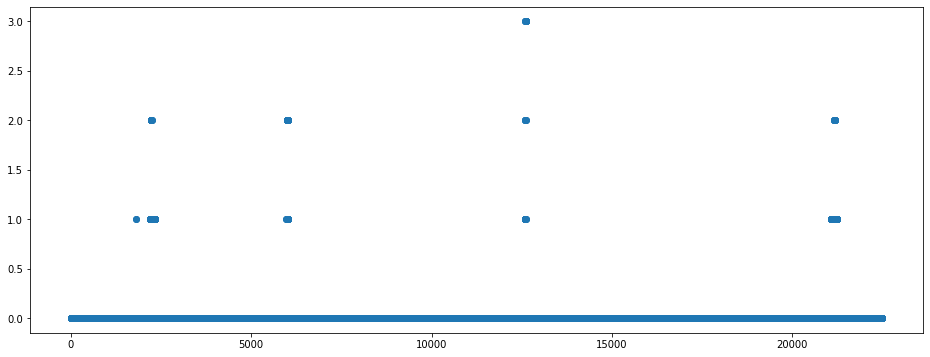

In [42]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(x, labels)

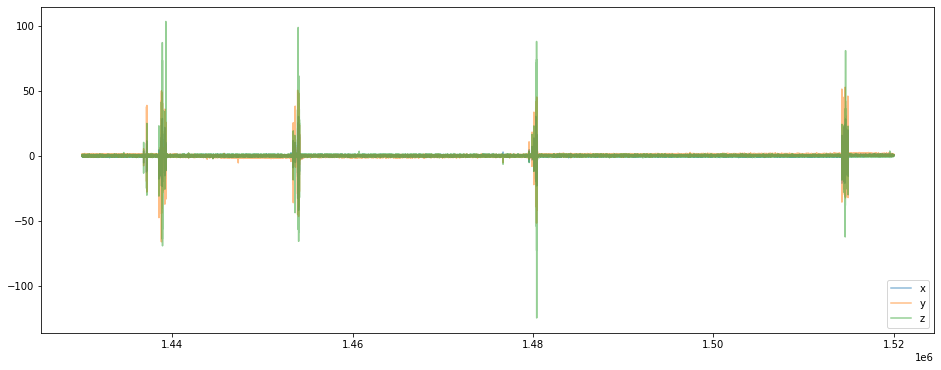

In [45]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df_small.time, df_small.x, label="x", alpha=0.5)
ax.plot(df_small.time, df_small.y, label='y', alpha=0.5)
ax.plot(df_small.time, df_small.z, label='z', alpha=0.5)

plt.legend(loc=4)